In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [27]:
from glob import glob
import re
import PIL as Image

In [4]:
lst = glob('gear_images_128x128_tst/*/*')

In [14]:
data = [(re.findall(r'(.*)\/(.*)\/([^\/]*)',f)[0][1], f) for f in lst]

In [13]:
le = LabelEncoder()

In [45]:
X_train_, X_test_, y_train_, y_test_ = train_test_split([x[1] for x in data],[x[0] for x in data])

In [46]:
y_train = le.fit_transform(y_train_)
y_test = le.fit_transform(y_test_)

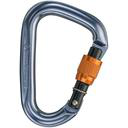

In [48]:
Image.Image.open(X_test_[0])

In [49]:
X_train = [np.array(Image.Image.open(x)).reshape(-1).reshape(-1) for x in X_train_]
X_test = [np.array(Image.Image.open(x)).reshape(-1).reshape(-1) for x in X_test_]

In [66]:
rf = RandomForestClassifier(n_estimators=300, max_depth=20)

In [67]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
pred = rf.predict_proba([X_test[0]])

In [69]:
np.amax(pred), np.argmax(pred)

(0.86, 2)

In [70]:
le.classes_[np.argmax(pred)]

'carabiners'

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [71]:
apred = rf.predict(X_test)

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 18   0   0   3   0   0   0   0   0   0   0   0]
 [  0  28   0   0   0   0   0   0   0   0   0   0]
 [  1   0  63   2   0   0   1   0   0   0   0   0]
 [  0   0   0  31   0   0   0   0   0   0   0   0]
 [  0   0   0   0  48   0   0   0   1   0   2   0]
 [  0   0   1   0   2 113   0   0   3   0   0   0]
 [  0   0   0   1   1   0  42   0   0   0   0   0]
 [  0   0   1   0   0   0   0  33   0   0   0   0]
 [  0   1   0   0   0  19   0   0  40   0   0   0]
 [  0   0   0   0   3   2   0   0   0   5   0   0]
 [  0   0   0   0   0   0   0   0   1   0  34   0]
 [  0   0   0   0   0   0   0   0   0   0   0  31]]


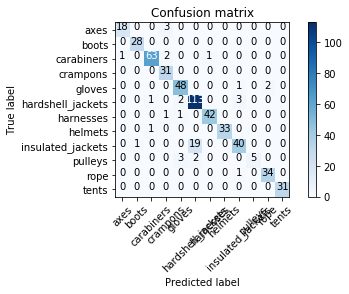

In [72]:
plot_confusion_matrix(confusion_matrix(y_test, apred), le.classes_);

In [73]:
accuracy_score(y_test, apred)

0.9152542372881356

In [74]:
le.classes_

array(['axes', 'boots', 'carabiners', 'crampons', 'gloves',
       'hardshell_jackets', 'harnesses', 'helmets', 'insulated_jackets',
       'pulleys', 'rope', 'tents'], dtype='<U17')

In [1]:
import pickle